### Контекст

Коронавирусная болезнь (COVID-19) — это инфекционное заболевание, вызываемое недавно обнаруженным коронавирусом. Большинство людей, инфицированных вирусом COVID-19, будут испытывать респираторные заболевания от легкой до средней степени тяжести и выздоравливают, не требуя специального лечения. Пожилые люди и люди с сопутствующими заболеваниями, такими как сердечно-сосудистые заболевания, диабет, хронические респираторные заболевания и рак, более склонны к развитию серьезных заболеваний.
На протяжении всего периода пандемии одной из основных проблем, с которыми сталкивались медицинские работники, является нехватка медицинских ресурсов и надлежащего плана их эффективного распределения. В эти трудные времена возможность предсказать, какие ресурсы могут потребоваться человеку во время положительного результата теста или даже до этого, окажет огромную помощь властям, поскольку они смогут закупать и организовывать ресурсы, необходимые для спасти жизнь этому пациенту.

Основная цель этого проекта — создать модель машинного обучения, которая, учитывая текущие симптомы, статус и историю болезни пациента с Covid-19, будет предсказывать, находится ли пациент в группе высокого риска или нет.

Набор данных предоставлен правительством Мексики (ссылка). Этот набор данных содержит огромное количество анонимной информации о пациентах, включая предварительные условия. Необработанный набор данных состоит из 21 уникальной функции и 1 048 576 уникальных пациентов. В логических функциях 1 означает «да», а 2 означает «нет». значения 97 и 99 отсутствуют.

**SEX** (пол): 1 для женщин и 2 для мужчин.

**AGE** (возраст): пациента.

**CLASIFFICATION_FINAL** (классификация): результаты тестов covid. Значения 1-3 означают, что у пациента был диагностирован ковид в разных градусов. 4 или выше означает, что пациент не является носителем ковида или что тест не дает результатов.

**PATIENT_TYPE** (тип пациента): тип лечения, полученного пациентом в отделении. 1 для возвращения домой и 2 для госпитализации.

**PNEUMONIA** (пневмония): есть ли у пациента уже воспаление воздухоносных мешков или нет.

**PREGNANCY** (беременность): беременна пациентка или нет.

**DIABETES** (диабет): есть ли у пациента диабет или нет.

**COPD**: Указывает, есть ли у пациента хроническая обструктивная болезнь легких или нет.

**ASTHMA** (астма): есть ли у пациента астма или нет.

**INMSUPR**: есть ли у пациента иммуносупрессия или нет.

**HIPERTENSION** (гипертония): есть ли у пациента гипертония или нет.

**CARDIOVASCULAR** (сердечно-сосудистые заболевания): есть ли у пациента заболевания, связанные с сердцем или кровеносными сосудами.

**RENAL CHRONIC** (почечная хроническая): имеет ли пациент хроническую почечную болезнь или нет.

**OTHER_DISEASE** (другое заболевание): есть ли у пациента другое заболевание или нет.

**OBESITY** (ожирение): страдает ли пациент ожирением или нет.

**TOBACCO** (табак): является ли пациент курильщиком.

**USMER**: Указывает, лечился ли пациент в медсанчастях первого, второго или третьего уровня.

**MEDICAL_UNIT** (медицинская часть): тип учреждения национальной системы здравоохранения, предоставившего помощь.

**INTUBED** (интубация): был ли пациент подключен к аппарату искусственной вентиляции легких.

**ICU**: указывает, был ли пациент госпитализирован в отделение интенсивной терапии.

**DATE_DIED** (дата смерти): Если пациент умер, укажите дату смерти, иначе 9999-99-99.

Импортируем необходимые библиотеки

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Считываем данные

In [152]:
df = pd.read_csv('Covid Data.csv')

# Изучение, очистка и подготовка данных для анализа

Выводим перваые 5 строк датасета

In [153]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


Выводим количество строк и столбцов датасета

In [154]:
df.shape

(1048575, 21)

Выводим общую информацию о столбцах

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Считаем сумму пропущенныхх значений

In [156]:
df.isnull().sum().sum()

0

Выводим количество уникальных значений для каждого столбца

In [157]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

Для каждого столбца с 2 и 3 уникальными значениями выводим их количество

In [158]:
for col in df.columns:
    if df[col].nunique() in [2, 3]:
        print(df[col].value_counts())

2    662903
1    385672
Name: USMER, dtype: int64
1    525064
2    523511
Name: SEX, dtype: int64
1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64
2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64
2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64
2     1030510
1       15062
98       3003
Name: COPD, dtype: int64
2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64
2     1031001
1       14170
98       3404
Name: INMSUPR, dtype: int64
2     882742
1     162729
98      3104
Name: HIPERTENSION, dtype: int64
2     1015490
1       28040
98       5045
Name: OTHER_DISEASE, dtype: int64
2     1024730
1       20769
98       3076
Name: CARDIOVASCULAR, dtype: int64
2     885727
1     159816
98      3032
Name: OBESITY, dtype: int64
2     1026665
1       18904
98       3006
Name: RENAL_CHRONIC, dtype: int64
2     960979
1      84376
98      3220
Name: TOBACCO, dtype: int64


Так как значения 97, 98 и 99 означают пропущенные значения и их количество относительно всей выборки мало, мы можем удалить строки с этими значениями без потери нужной информации

In [159]:
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for col in cols :
    df = df[(df[col] == 1)|(df[col] == 2)]

Выводим количество строк и столбцов, после удаления строк с пропущенными значениями. Было удалено около 20000 строк

In [160]:
df.shape

(1025152, 21)

Создадим новый столбец "DEATH" со значениями 1 и 2, где 1 означет, что пациент мертв, а 2, что пациент жив 

In [161]:
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

Строим гистограмму для столбца "PREGNANT"

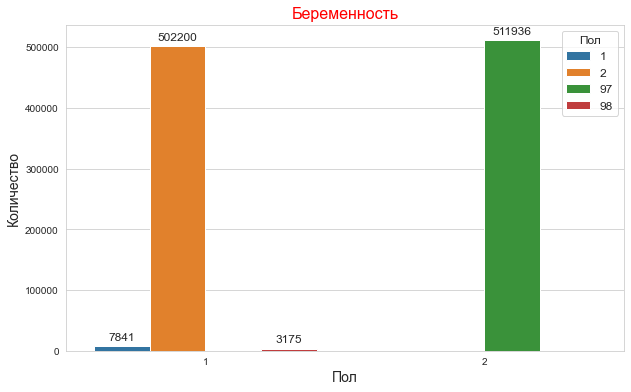

In [162]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x="SEX", hue="PREGNANT", ax=ax)
ax.set_title("Беременность", fontsize=16, color="red")
ax.set_xlabel("Пол", fontsize=14)
ax.set_ylabel("Количество", fontsize=14)
ax.legend(title="Пол", fontsize=12, title_fontsize=12, loc="upper right")

for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=12, padding=4)

plt.show()

Видно, что все значения 97 относятся к мужчинам. Так как мужчины не могут родить, заменим все значения 97 на 2. Также удалим пропущенные значения - 98

In [163]:
df.PREGNANT = df.PREGNANT.replace(97,2)

df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

Строим гистограмму для столбца "INTUBED" и столбца "ICU"

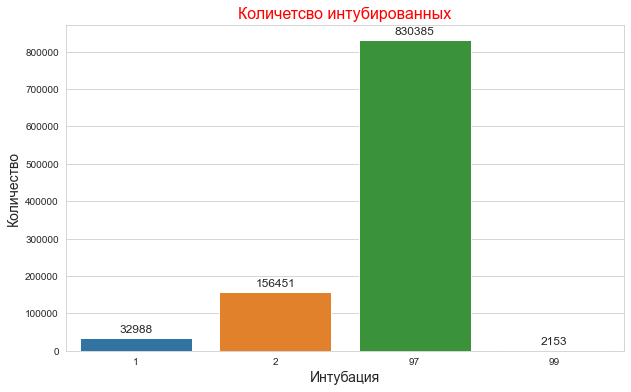

In [164]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x="INTUBED", ax=ax)
ax.set_title("Количетсво интубированных", fontsize=16, color="red")
ax.set_xlabel("Интубация", fontsize=14)
ax.set_ylabel("Количество", fontsize=14)

for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=12, padding=4)

plt.show()

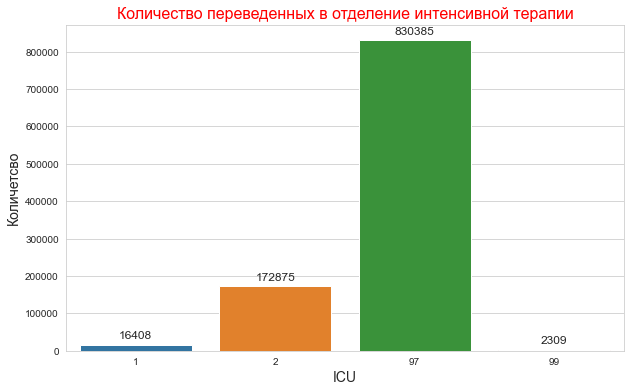

In [165]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x="ICU", ax=ax)
ax.set_title("Количество переведенных в отделение интенсивной терапии", fontsize=16, color="red")
ax.set_xlabel("ICU", fontsize=14)
ax.set_ylabel("Количетсво", fontsize=14)

for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=12, padding=4)
    
plt.show()

Видно, что большиство значений в этих столбцах пропущены. Учитывая количество пропущенных значений в этих столбцах, удалим эти столбцы. Также удалим столбец "DATE_DIED", так как мы ввели новый столбец "DEATH", заменяющий его

In [166]:
df = df.drop(columns=["INTUBED","ICU","DATE_DIED"])

Из аннотации для столбца "CLASIFFICATION_FINAL" нам известно, что значения 1-3 означают, что у пациента был диагностирован ковид в разных градусов. 4 или выше означает, что пациент не является носителем ковида или что тест не дает результатов. Заменим их на 1 и 2

In [167]:
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)

Выведем уникальные значения для всех столбцов посел их обработки

In [168]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
PNEUMONIA                 2
AGE                     121
PREGNANT                  2
DIABETES                  2
COPD                      2
ASTHMA                    2
INMSUPR                   2
HIPERTENSION              2
OTHER_DISEASE             2
CARDIOVASCULAR            2
OBESITY                   2
RENAL_CHRONIC             2
TOBACCO                   2
CLASIFFICATION_FINAL      2
DEATH                     2
dtype: int64

# Визуализация и анализ данных

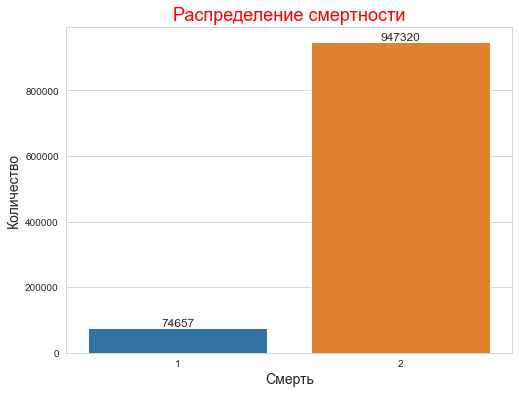

In [169]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(data=df, x='DEATH', ax=ax)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

ax.set_title("Распределение смертности", fontsize=18, color="red")
ax.set_xlabel("Смерть", fontsize=14)
ax.set_ylabel("Количество", fontsize=14)

plt.show()

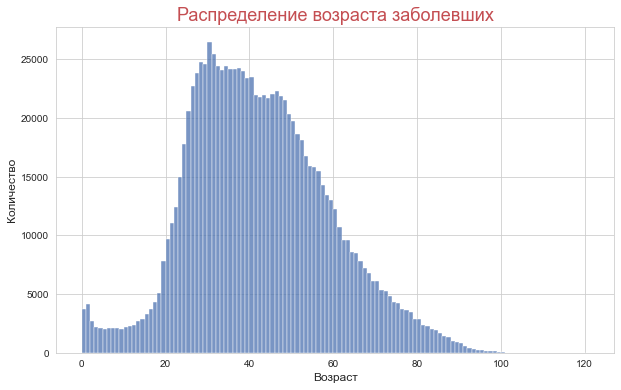

In [170]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['AGE'], ax=ax, kde=False, color='#4c72b0', binwidth=1)
ax.set_xlabel('Возраст', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение возраста заболевших', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

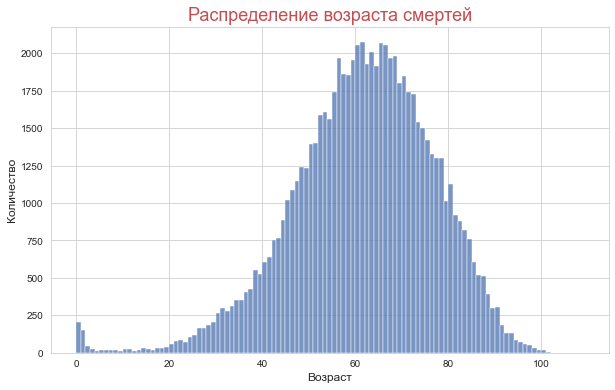

In [171]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df[df['DEATH']==1]['AGE'], ax=ax, kde=False, color='#4c72b0', binwidth=1)
ax.set_xlabel('Возраст', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение возраста смертей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

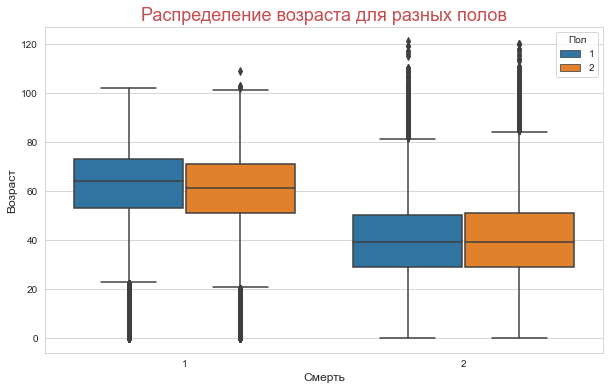

In [172]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='DEATH', y='AGE', hue='SEX', data=df, ax=ax)
ax.set_xlabel('Смерть', fontsize=12)
ax.set_ylabel('Возраст', fontsize=12)
ax.set_title('Распределение возраста для разных полов', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)
ax.legend(loc='best', title='Пол')

plt.show()

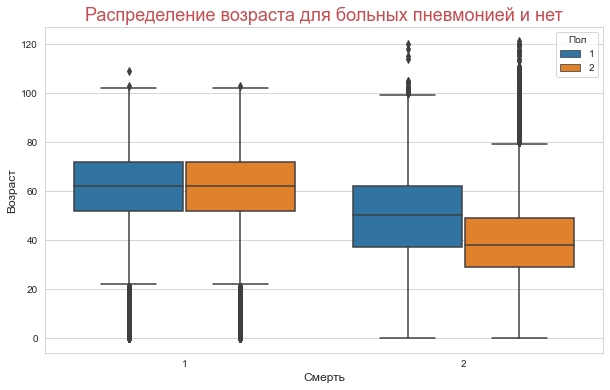

In [173]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='DEATH', y='AGE', hue='PNEUMONIA', data=df, ax=ax)
ax.set_xlabel('Смерть', fontsize=12)
ax.set_ylabel('Возраст', fontsize=12)
ax.set_title('Распределение возраста для больных пневмонией и нет', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)
ax.legend(loc='best', title='Пол')

plt.show()

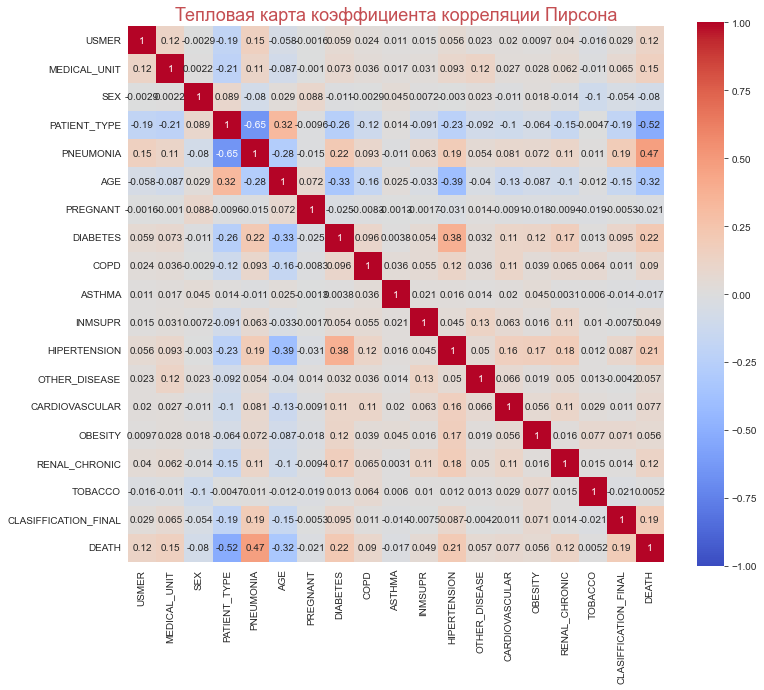

In [174]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12, 10))

corr = df.corr(method='pearson')
sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True, ax=ax)
ax.set_title('Тепловая карта коэффициента корреляции Пирсона', fontsize=18, color='#c44e52')

plt.show()

# Выбераем признаки для обучения

In [175]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=unrelevant_columns,inplace=True)

In [176]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,1,1
1,2,1,1,1,72,2,1,1,2,1
2,2,1,2,2,55,1,2,2,1,1
3,2,1,1,2,53,2,2,2,2,1
4,2,1,1,2,68,1,1,2,1,1


In [177]:
df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

In [178]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df['AGE'] = standard_scaler.fit_transform(df.loc[:,['AGE']])

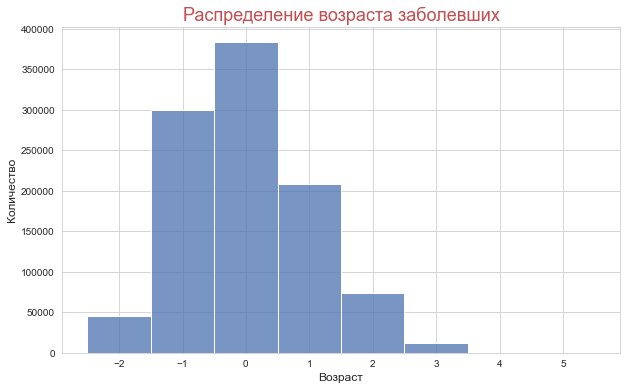

In [179]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['AGE'], ax=ax, kde=False, color='#4c72b0', binwidth=1)
ax.set_xlabel('Возраст', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение возраста заболевших', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

In [184]:
df["DEATH"].replace(2, 0)

0          1
1          1
2          1
3          1
4          1
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: DEATH, Length: 1021977, dtype: int64

In [185]:
X = df.drop(columns="DEATH")
y = df["DEATH"]

In [186]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (817581, 20)
Test_x : (204396, 20)
Train_y : (817581,)
Test_y : (204396,)


# Логистическая регрессия

In [187]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9379146362942523


In [188]:
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.96688362 0.50425815]


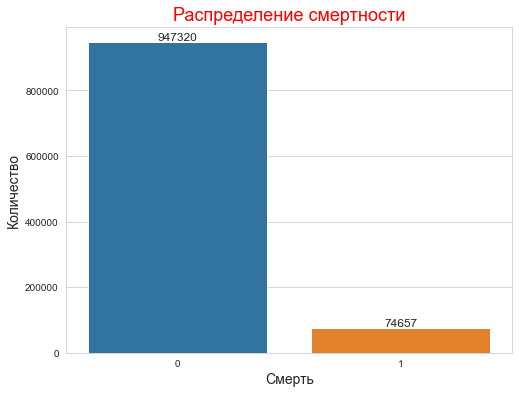

In [189]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(data=df, x='DEATH', ax=ax)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

ax.set_title("Распределение смертности", fontsize=18, color="red")
ax.set_xlabel("Смерть", fontsize=14)
ax.set_ylabel("Количество", fontsize=14)

plt.show()

In [190]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(X,y)

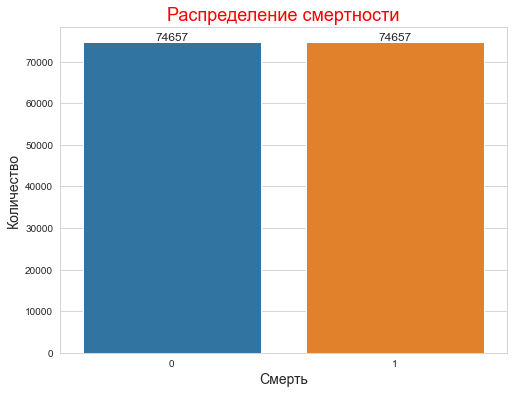

In [191]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(data=df, x=y_resampled, ax=ax)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

ax.set_title("Распределение смертности", fontsize=18, color="red")
ax.set_xlabel("Смерть", fontsize=14)
ax.set_ylabel("Количество", fontsize=14)

plt.show()

# Логистическая регресия после under_sampling

In [192]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(train_x2,train_y2)
print("Logistic Regression Accuracy :",logreg.score(test_x2, test_y2))

Logistic Regression Accuracy : 0.9044637176439072


In [193]:
print("Logistic Regression F1 Score :",f1_score(test_y2,logreg.predict(test_x2),average=None))

Logistic Regression F1 Score : [0.90331108 0.9055892 ]


In [250]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100)
xgbc.fit(train_x2,train_y2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [251]:
y_pred2 = xgbc.predict(test_x2)

In [252]:
print("Logistic Regression Accuracy :",xgbc.score(test_x2, test_y2))
print("Logistic Regression F1 Score :",f1_score(test_y2,xgbc.predict(test_x2),average=None))

Logistic Regression Accuracy : 0.9131031711482437
Logistic Regression F1 Score : [0.90986141 0.91611986]


In [253]:
from sklearn.metrics import roc_curve, auc

In [254]:
fpr, tpr, thresholds = roc_curve(test_y2, y_pred2)
roc_auc = auc(fpr, tpr)

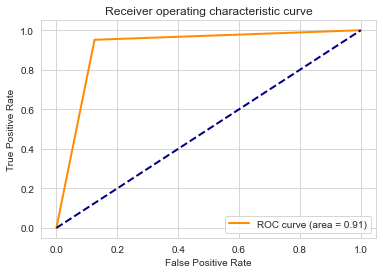

In [255]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()